#  Exploratory Data Analysis (EDA) of the arXiv Dataset

This notebook performs an initial exploratory data analysis on the arXiv dataset from Kaggle. The goal is to understand the structure of the data, identify key trends, and visualize interesting patterns.

We'll cover:
1.  **Setup**: Downloading the data and importing libraries.
2.  **Data Loading & Inspection**: Loading the dataset and getting a first look.
3.  **Data Cleaning & Preprocessing**: Preparing the data for analysis (e.g., handling dates, text).
4.  **Univariate Analysis**: Analyzing individual features like publication year, categories, and text length.
5.  **Text Analysis**: Creating a word cloud to visualize the most common terms in paper abstracts.

## 1. Setup

First, we'll download the dataset using the `kagglehub` library and import the necessary Python libraries for our analysis.

In [1]:
import kagglehub
import os

print("Downloading dataset...")
path = kagglehub.dataset_download("Cornell-University/arxiv")
print(f"Dataset downloaded to: {path}")

# Step 1.2: Locate the JSON file directly
data_file = os.path.join(path, "arxiv-metadata-oai-snapshot.json")

if os.path.exists(data_file):
    print(f"Found dataset file at: {data_file}")
else:
    print("Could not find JSON file, check the dataset contents.")


Dataset downloaded to: C:\Users\wasif\.cache\kagglehub\datasets\Cornell-University\arxiv\versions\250
Found dataset file at: C:\Users\wasif\.cache\kagglehub\datasets\Cornell-University\arxiv\versions\250\arxiv-metadata-oai-snapshot.json


In [2]:
import torch

print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current GPU:", torch.cuda.current_device())
    print("GPU Name:", torch.cuda.get_device_name(torch.cuda.current_device()))


CUDA Available: True
Number of GPUs: 1
Current GPU: 0
GPU Name: NVIDIA GeForce RTX 2060


In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Data Loading & Inspection

The dataset is a large JSON file where each line is a distinct JSON object representing a paper. To manage memory usage, we'll load only a subset of the data (e.g., the first 200,000 records) for this EDA.

In [4]:
# Load a subset of the data from the JSON file
def load_data_subset(file_path, num_records=200000):
    records = []
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i >= num_records:
                break
            records.append(json.loads(line))
    return pd.DataFrame(records)

df = load_data_subset(data_file)
print(f"Successfully loaded {len(df)} records.")

Successfully loaded 200000 records.


In [6]:
print("DataFrame Shape:")
print(df.shape)
print("\nDataFrame Info:")
df.info()

print("\nFirst 5 rows:")
df.head(100)

DataFrame Shape:
(200000, 14)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              200000 non-null  object
 1   submitter       200000 non-null  object
 2   authors         200000 non-null  object
 3   title           200000 non-null  object
 4   comments        171869 non-null  object
 5   journal-ref     100642 non-null  object
 6   doi             121476 non-null  object
 7   report-no       17680 non-null   object
 8   categories      200000 non-null  object
 9   license         156778 non-null  object
 10  abstract        200000 non-null  object
 11  versions        200000 non-null  object
 12  update_date     200000 non-null  object
 13  authors_parsed  200000 non-null  object
dtypes: object(14)
memory usage: 21.4+ MB

First 5 rows:


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0704.0096,M. C. Nucci,M.C. Nucci and P.G.L. Leach,Much ado about 248,5 pages,None,None,None,nlin.SI,None,In this note we present three representation...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[Nucci, M. C., ], [Leach, P. G. L., ]]"
96,0704.0097,Yasuyuki Kawahigashi,Yasuyuki Kawahigashi,Conformal Field Theory and Operator Algebras,"For the Proceedings of ICMP (Rio de Janeiro, 2...",None,None,None,math-ph math.MP math.OA,None,We review recent progress in operator algebr...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[Kawahigashi, Yasuyuki, ]]"
97,0704.0098,Jack Raymond,"Jack Raymond, David Saad",Sparsely-spread CDMA - a statistical mechanics...,"23 pages, 5 figures, figure 1 amended since pu...",J. Phys. A: Math. Theor. 40 No 41 (12 October ...,10.1088/1751-8113/40/41/004,None,cs.IT math.IT,None,"Sparse Code Division Multiple Access (CDMA),...","[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-11-13,"[[Raymond, Jack, ], [Saad, David, ]]"
98,0704.0099,Koenraad M. R. Audenaert,Koenraad M.R. Audenaert and Jaspal Singh Aujla,On Ando's inequalities for convex and concave ...,18 pages,None,None,None,math.FA,None,For positive semidefinite matrices $A$ and $...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[Audenaert, Koenraad M. R., ], [Aujla, Jaspal..."


## 3. Data Cleaning & Preprocessing

Before analysis, we need to perform some preprocessing steps:
- Convert the `update_date` column to a proper datetime format.
- Extract the year from the `update_date` for time-series analysis.
- Calculate the length of the title and abstract.

In [13]:
# Convert 'update_date' to datetime objects
df['update_date'] = pd.to_datetime(df['update_date'])

# Extract the year of publication
df['year'] = df['update_date'].dt.year

# Calculate text lengths
df['abstract_length'] = df['abstract'].str.len()
df['title_length'] = df['title'].str.len()

print("Preprocessing complete. 'year', 'abstract_length', and 'title_length' columns added.")
df[['id', 'update_date', 'year', 'title_length', 'abstract_length']].head()

Preprocessing complete. 'year', 'abstract_length', and 'title_length' columns added.


,id,update_date,year,title_length,abstract_length
0,0704.0001,2008-11-26,2008,87,983
1,0704.0002,2008-12-13,2008,40,798
2,0704.0003,2008-01-13,2008,83,880
3,0704.0004,2007-05-23,2007,89,248
4,0704.0005,2013-10-15,2013,52,223


## 4. Univariate Analysis

Let's analyze some of the key features individually.

### 4.1 Number of Papers Over Time
Let's visualize how many papers were published each year. This can show the growth of research activity over time.

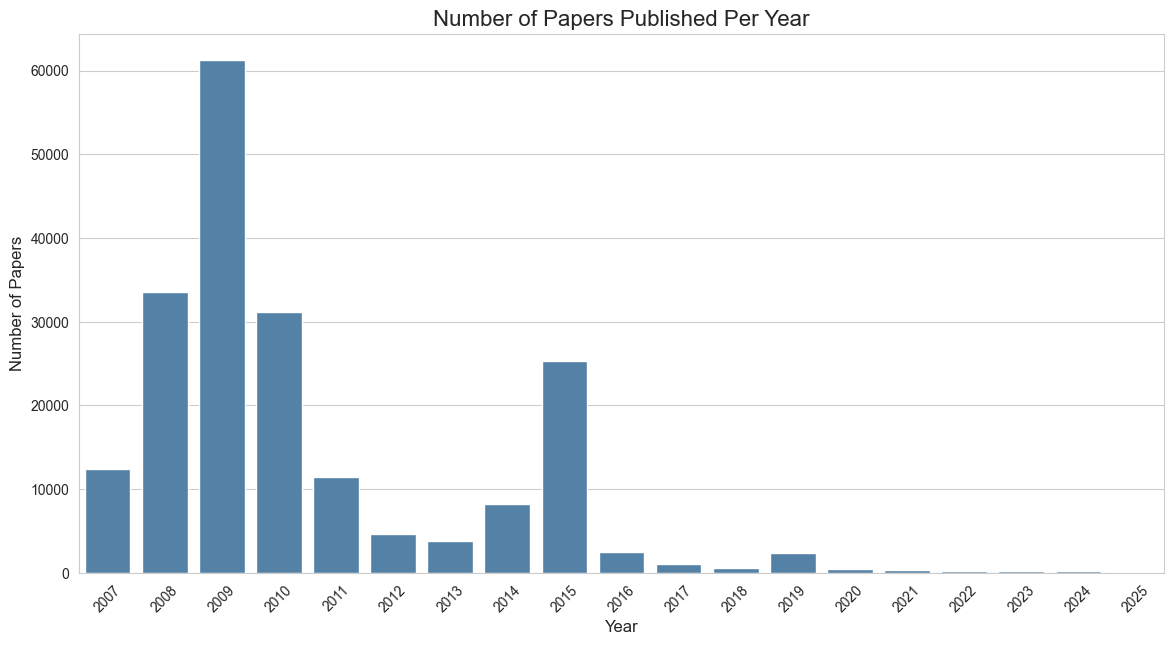

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='year', color='steelblue')
plt.title('Number of Papers Published Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 4.2 Most Common Categories
The `categories` column contains one or more subject classifications for each paper. We can find out which research areas are the most common in our dataset.

C:\Users\wasif\AppData\Local\Temp\ipykernel_157784\614554939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_categories.values, y=top_20_categories.index, palette='viridis')


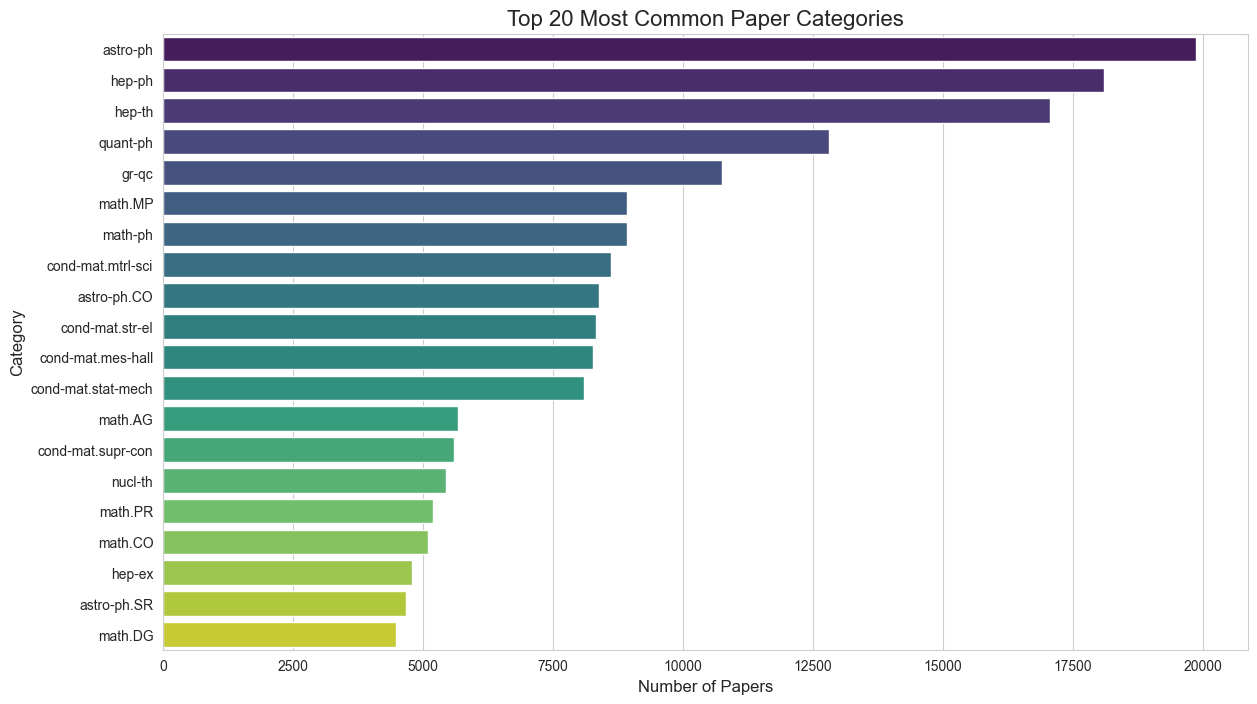

In [ ]:
all_categories = df['categories'].str.split(' ').explode()
top_20_categories = all_categories.value_counts().nlargest(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_categories.values, y=top_20_categories.index, palette='viridis')
plt.title('Top 20 Most Common Paper Categories', fontsize=16)
plt.xlabel('Number of Papers', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

### 4.3 Distribution of Abstract and Title Lengths
Analyzing the length of abstracts and titles can give us an idea of the typical verbosity and scope of the papers.

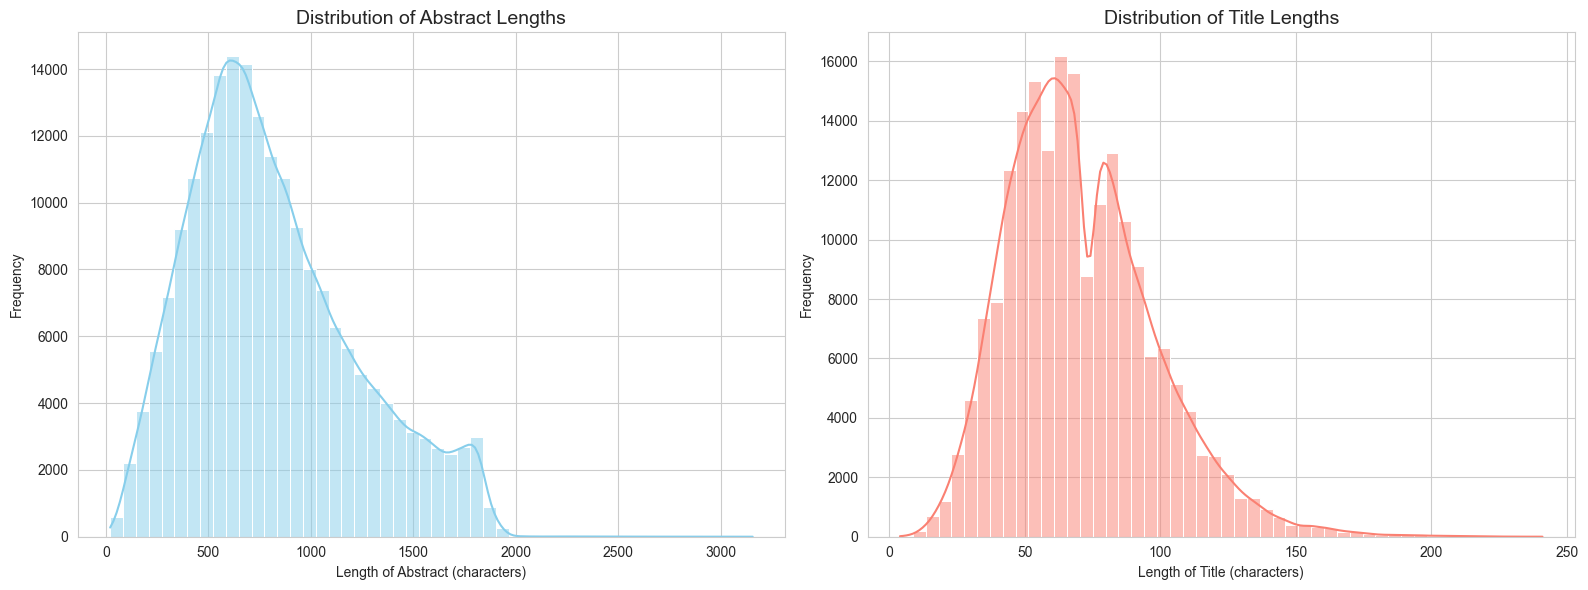

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['abstract_length'], bins=50, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Abstract Lengths', fontsize=14)
axes[0].set_xlabel('Length of Abstract (characters)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['title_length'], bins=50, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Distribution of Title Lengths', fontsize=14)
axes[1].set_xlabel('Length of Title (characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Text Analysis: Word Cloud of Abstracts

A word cloud is a great way to get a high-level visual understanding of the most frequent terms in the paper abstracts. It can quickly highlight key topics and themes in the dataset.

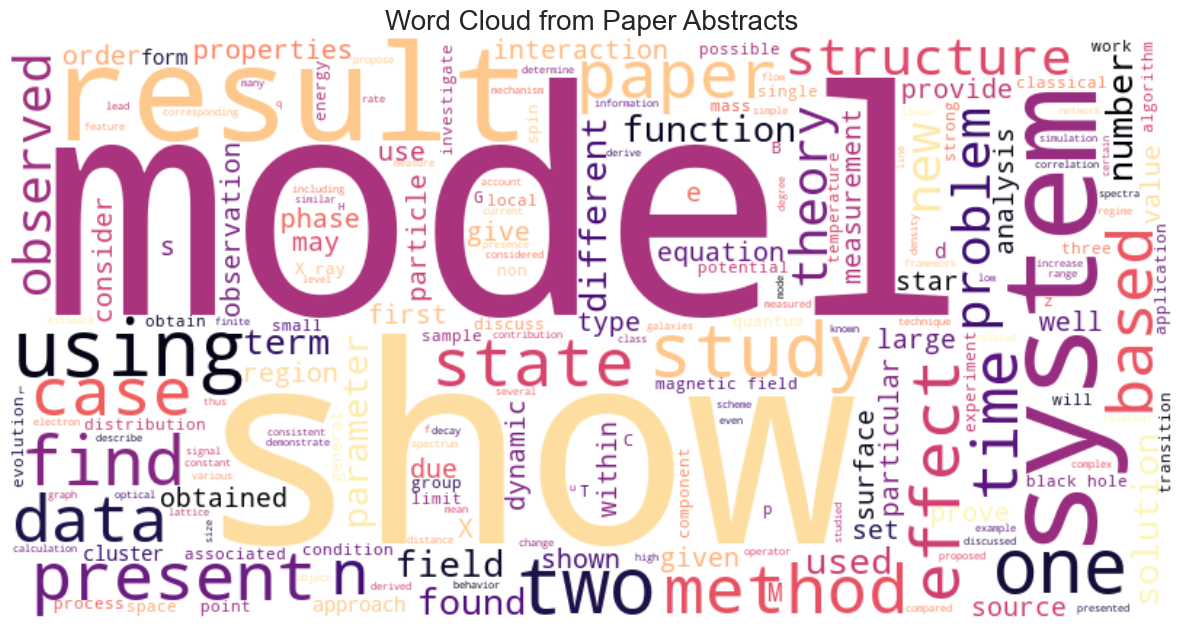

In [ ]:

text = ' '.join(df['abstract'].sample(10000, random_state=42))

# Create and generate a word cloud image
wordcloud = WordCloud(
    background_color='white', 
    width=800, 
    height=400, 
    colormap='magma'
).generate(text)

# Display the generated image
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Word Cloud from Paper Abstracts', fontsize=20)
plt.show()